In [ ]:
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

Careful! Fourier has been integrated into "best known" dataframe. The comparison before is using the data from the following commit:

https://github.com/jpmorganchase/jpmc-argonne-quantum-optimization/commit/27355280211e887912eb49741bf8775634957e4b

To check out the relevant version of the dataframe:

```
git checkout 27355280211e887912eb49741bf8775634957e4b -- assets/best_known_QAOA_parameters_wrt_MF.json
```

In [ ]:
import pickle
import pandas as pd
from pathlib import Path

In [ ]:
import sys
sys.path.append("../code/")

from labs import true_optimal_mf
from utils import get_all_best_known

In [30]:
rows = []
for fname in Path("../scripts/data/").glob("fourier_MF_*"):
    rows.append(pickle.load(open(fname, "rb")))

df = pd.DataFrame(rows, columns=rows[0].keys())

df['AR'] = df.apply(
    lambda row: row['merit factor'] / true_optimal_mf[row['N']],
    axis=1
)

In [31]:
df = df.set_index(["N", "p"]).merge(
    get_all_best_known().set_index(["N", "p"]), 
    left_index=True, right_index=True, how="outer"
).reset_index()

In [32]:
df['MF Fourier / MF cold start'] = df['merit factor'] / df['merit factor opt4MF']

In [33]:
dftmp = df[df["N"] > 12].sort_values('MF Fourier / MF cold start').dropna(subset=['MF Fourier / MF cold start'])

In [34]:
dftmp = dftmp[
    ['N','p','beta', 'gamma', 'merit factor','beta opt4MF', 'gamma opt4MF', 'merit factor opt4MF', 'MF Fourier / MF cold start']
].rename(columns={
    'beta': 'beta FOURIER',
    'gamma': 'gamma FOURIER',
    'merit factor': 'merit factor FOURIER',
    'beta opt4MF': 'beta directly optimized',
    'gamma opt4MF': 'gamma directly optimized',
    'merit factor opt4MF': 'merit factor directly optimized',
    'MF Fourier / MF cold start': 'MF FOURIER / MF directly optimized',
}).sort_values(['N', 'p']).reset_index()

In [35]:
dftmp

,index,N,p,beta FOURIER,gamma FOURIER,merit factor FOURIER,beta directly optimized,gamma directly optimized,merit factor directly optimized,MF FOURIER / MF directly optimized
0,372,13,2,"[0.16812060831982445, 0.12144166397193046]","[-0.03336888820142596, -0.08204382236991882]",2.492289,"[0.1680193594, 0.12149698610000001]","[-0.0333685686, -0.08198982760000001]",2.492290,1.000000
1,373,13,3,"[0.17575563788726625, 0.13199444090062654, 0.1...","[-0.028435145172531363, -0.0643962758491233, -...",2.793389,"[0.1757346883, 0.1319999849, 0.10224698310000001]","[-0.0284384047, -0.0644005632, -0.099444868]",2.793389,1.000000
2,374,13,4,"[0.18533001081434589, 0.1265945929074086, 0.11...","[-0.024900866170080523, -0.05360951285229997, ...",3.027014,"[0.1851684592, 0.126554873, 0.1164110518, 0.09...","[-0.0249090202, -0.0535763376, -0.0737500544, ...",3.027016,0.999999
3,375,13,5,"[0.19329077046522622, 0.1361304096555171, 0.12...","[-0.024556016194438514, -0.05255471331355701, ...",3.210094,"[0.1933430794, 0.1360661288, 0.122276956, 0.11...","[-0.0245503303, -0.052553301100000005, -0.0699...",3.210095,1.000000
4,376,13,6,"[0.19329949419203143, 0.1375294796219624, 0.11...","[-0.02336061671752649, -0.049604300401453826, ...",3.356300,"[0.1941601433, 0.1378063927, 0.1153503837, 0.1...","[-0.023337775, -0.049749177400000004, -0.06135...",3.356702,0.999880
5,377,13,7,"[0.19530655073698985, 0.1397699349739498, 0.11...","[-0.022723755894584304, -0.048009116785471664,...",3.500057,"[0.1952945973, 0.1397090394, 0.118401617, 0.10...","[-0.0227249474, -0.0480345961, -0.059236034800...",3.500061,0.999999
6,378,13,8,"[0.20260628229594282, 0.1401113591258258, 0.12...","[-0.023721963857683492, -0.048657722257991136,...",3.631655,"[0.2025374905, 0.1399889347, 0.1242399035, 0.1...","[-0.0237489967, -0.0487077408, -0.0587682848, ...",3.631662,0.999998
7,379,13,9,"[0.20624577543744826, 0.1466731617233806, 0.12...","[-0.023018749614289086, -0.04909879807107322, ...",3.746235,"[0.2064571856, 0.1466993937, 0.122406898800000...","[-0.0229849615, -0.0490676798, -0.057536534, -...",3.746245,0.999997
8,380,13,10,"[0.21057553518694946, 0.15243276743917, 0.1289...","[-0.021708671705302232, -0.04823044636863337, ...",3.843045,"[0.2105528865, 0.1523755312, 0.1288653179, 0.1...","[-0.0217188344, -0.0482227708, -0.058681647100...",3.843047,0.999999
9,381,13,11,"[0.20672615355482113, 0.15507312933793743, 0.1...","[-0.023084378567167673, -0.04897694663377993, ...",3.953557,"[0.2067688121, 0.1549904719, 0.1331570738, 0.1...","[-0.023075627, -0.0489956438, -0.0602274767000...",3.953585,0.999993


In [36]:
dftmp.to_json("../qokit/assets/FOURIER_vs_direct_optimization.json", indent=4, orient="index")

In [37]:
df = dftmp

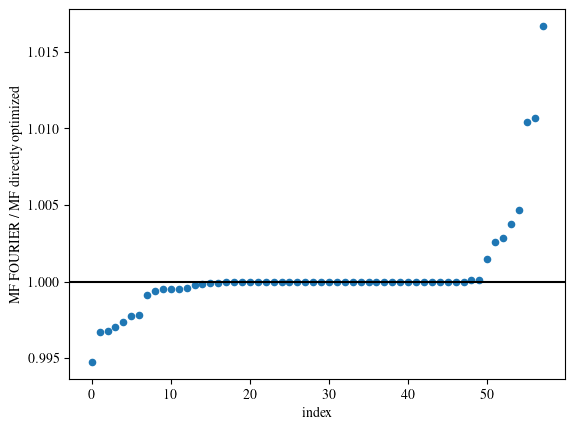

In [39]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
df[df["N"] > 12].sort_values('MF FOURIER / MF directly optimized')['MF FOURIER / MF directly optimized'].dropna().reset_index(drop=True).reset_index().plot(
    ax=ax, kind='scatter',x='index', y='MF FOURIER / MF directly optimized'
)
ax.set_ylabel('MF FOURIER / MF directly optimized')
plt.axhline(1, c='k')

N
24    AxesSubplot(0.125,0.11;0.775x0.77)
Name: AR, dtype: object

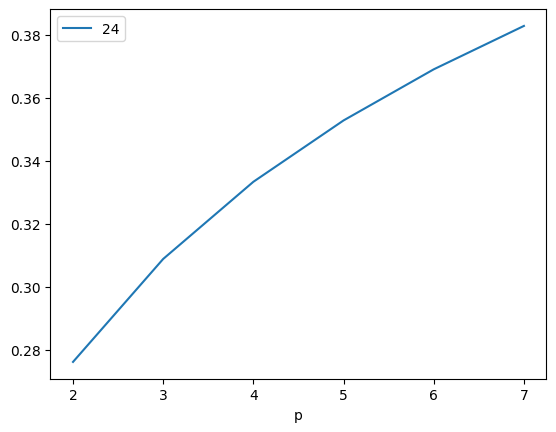

In [51]:
df[
    df['N'] == 24
].sort_values('p').set_index('p').groupby('N')['AR'].plot(legend=True)

### Fourier finds, at small p, the same parameters as cold start

When the schedule has large "jumps", smooth Fourier schedules do better. This is evidence that jumps are not "meaningful"

Potential evidence that more seeds are needed at high `p`?

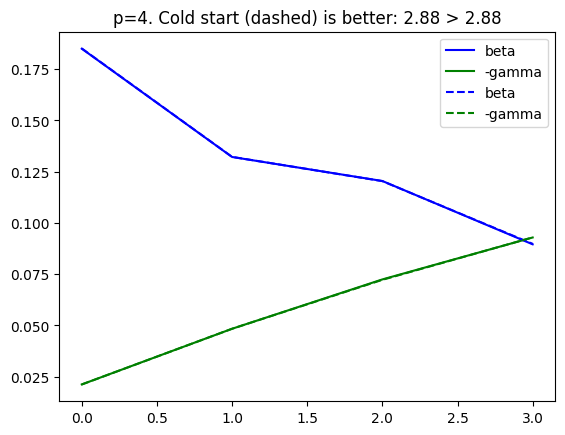

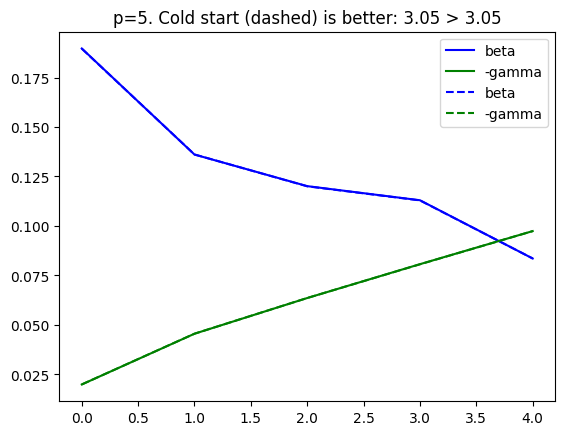

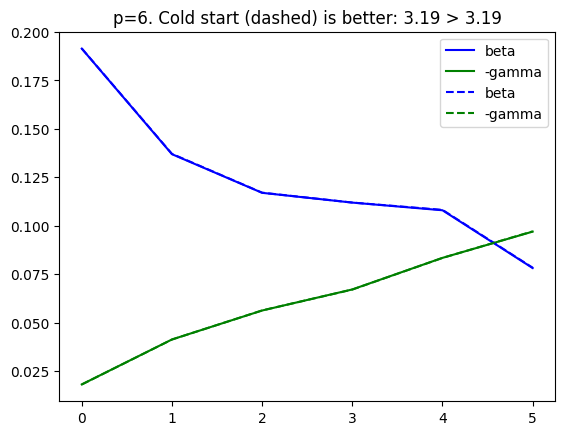

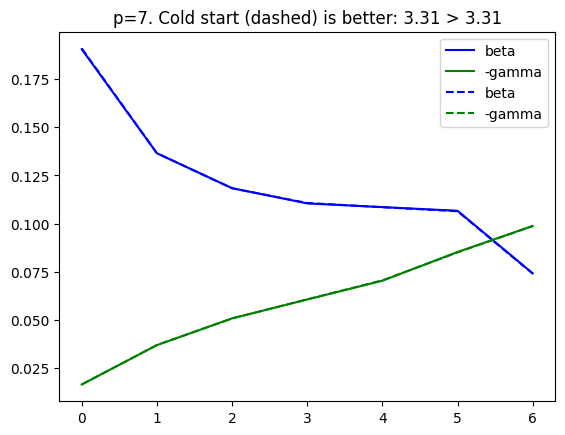

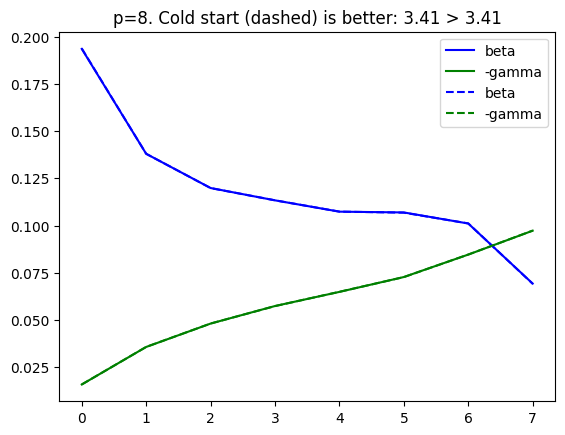

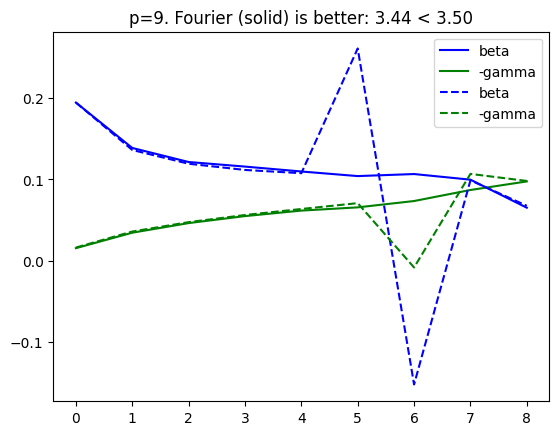

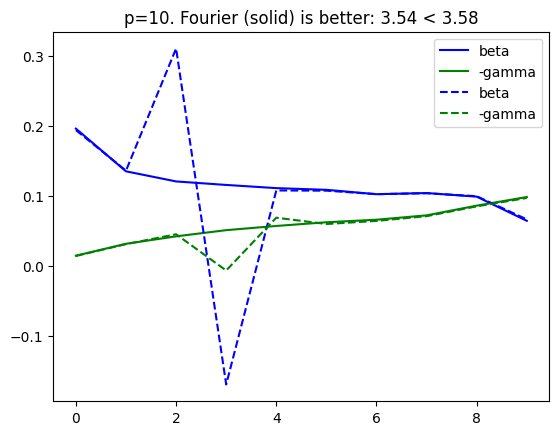

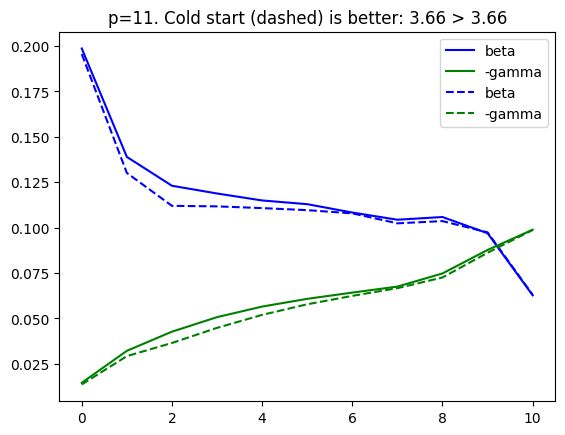

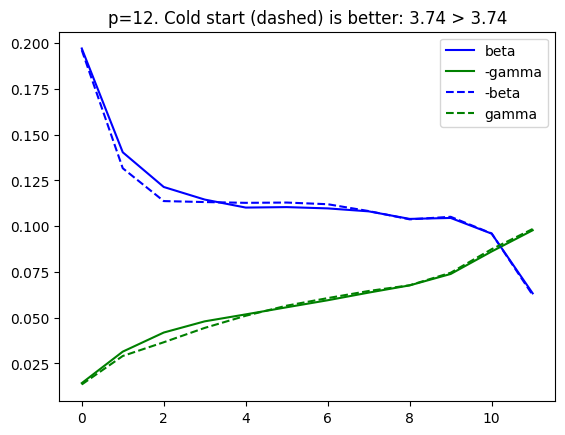

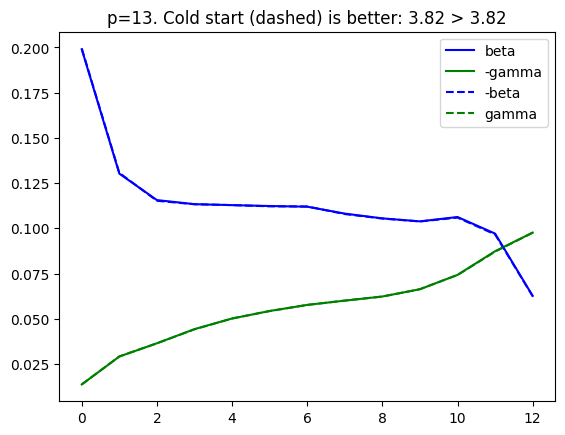

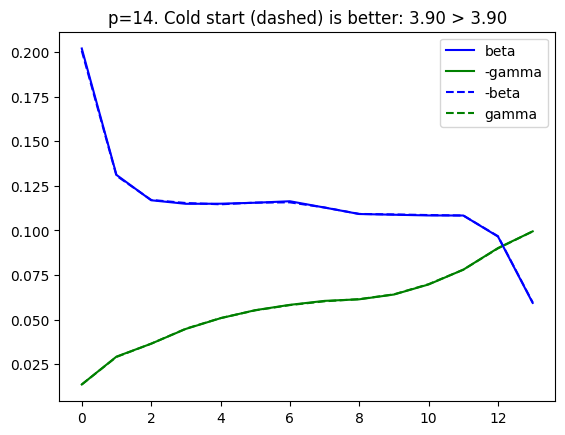

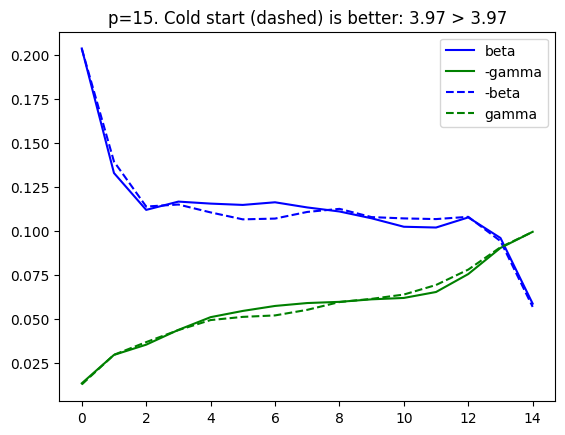

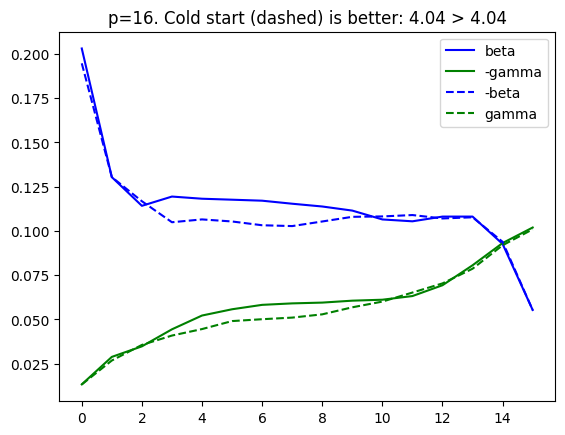

In [41]:
import numpy as np

suffix = " opt4MF"
for _, row1 in df[(df['N'] == 15) & (df['p'] > 3)].sort_values('p').iterrows():
# row = df[(df['N'] == 13) & (df['p'] == 12)].squeeze()
# for row1 in [row]:
    if pd.isna(row1['merit factor'+suffix]):
        continue
    plt.plot(row1['beta'], label='beta', c='b')
    plt.plot(-np.array(row1['gamma']), label='-gamma', c='g')
    if (row1['beta'+suffix][0] - row1['beta'+suffix][-1]) * (row1['beta'][0] - row1['beta'][-1]) < 0:
        # flip sign
        plt.plot(-np.array(row1['beta'+suffix]), label='-beta', c='b', linestyle='dashed')
        plt.plot(np.array(row1['gamma'+suffix]), label='gamma', c='g', linestyle='dashed')
    else:
        plt.plot(row1['beta'+suffix], label='beta', c='b', linestyle='dashed')
        plt.plot(-np.array(row1['gamma'+suffix]), label='-gamma', c='g', linestyle='dashed')
    
    title = f"p={row1['p']}"
    if row1['merit factor'+suffix] > row1['merit factor']:
        title += f". Cold start (dashed) is better: {row1['merit factor'+suffix]:.2f} > {row1['merit factor']:.2f}"
    else:
        title += f". Fourier (solid) is better: {row1['merit factor'+suffix]:.2f} < {row1['merit factor']:.2f}"
    plt.title(title)
    plt.legend()
    plt.show()

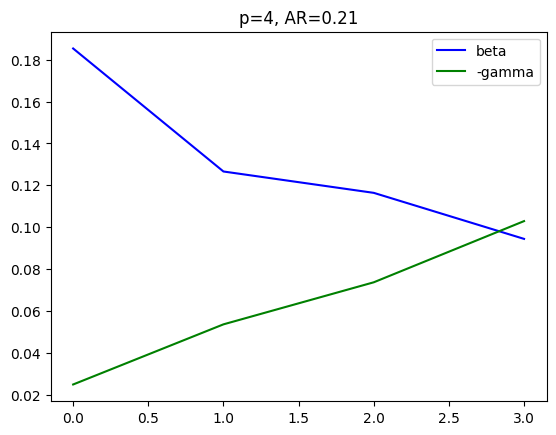

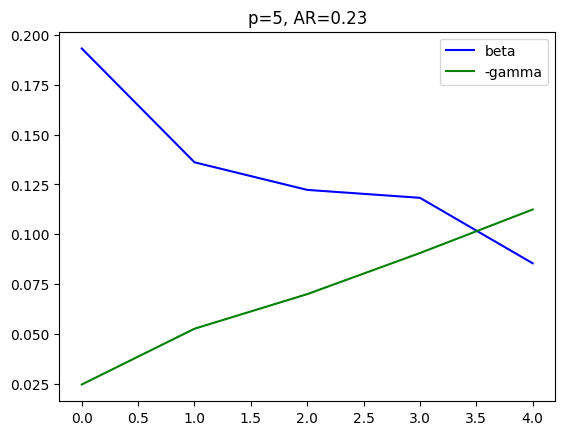

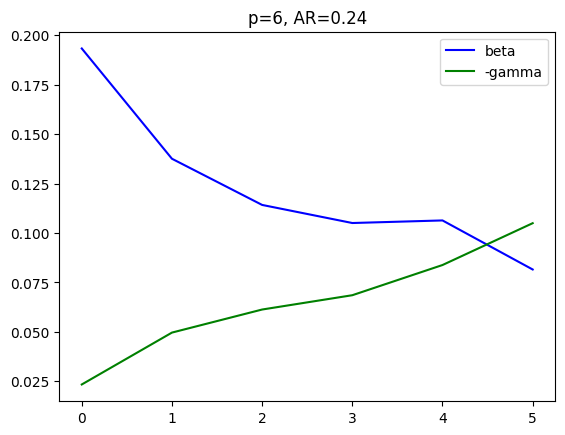

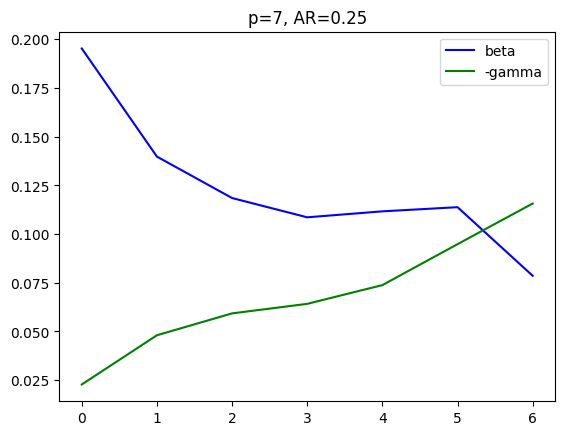

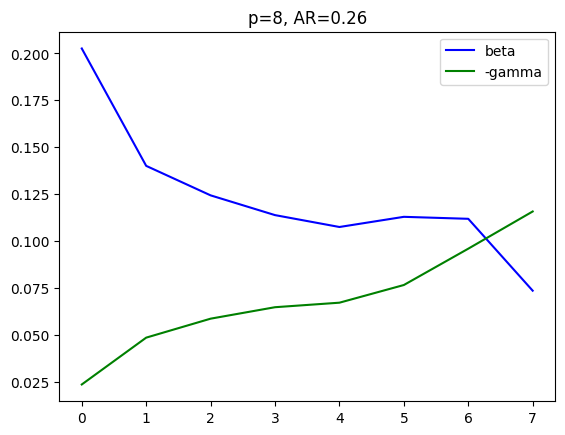

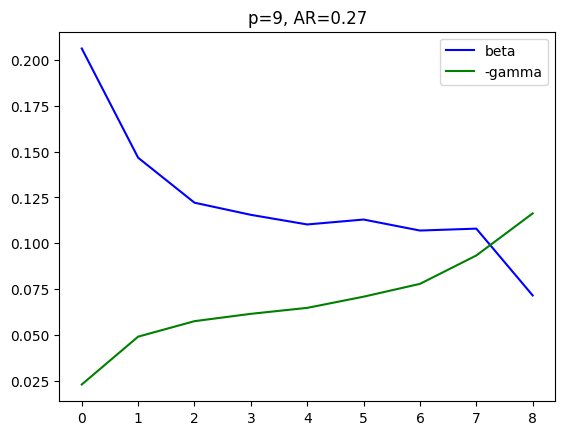

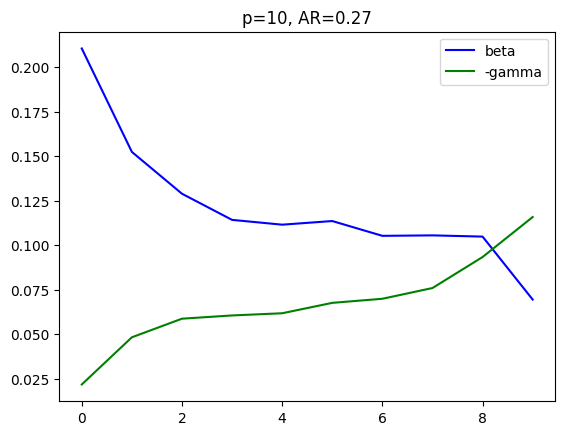

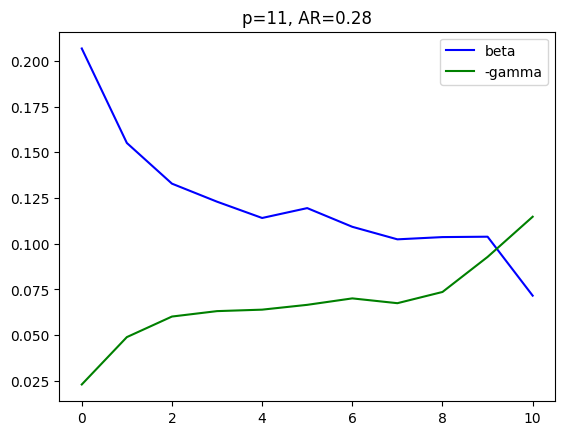

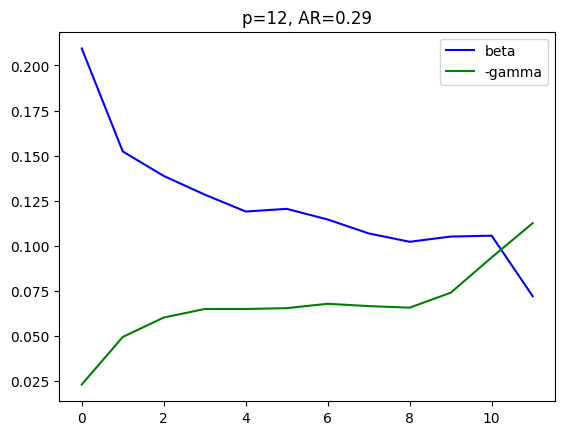

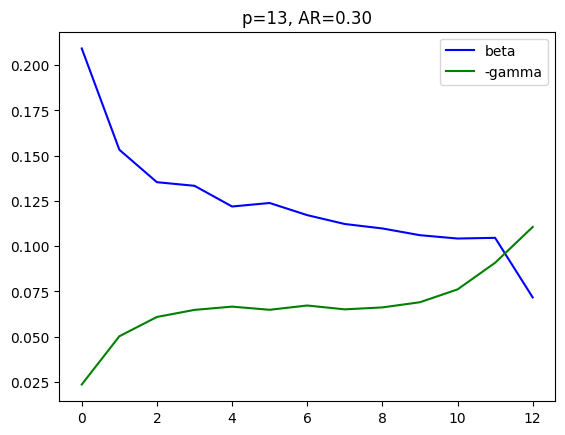

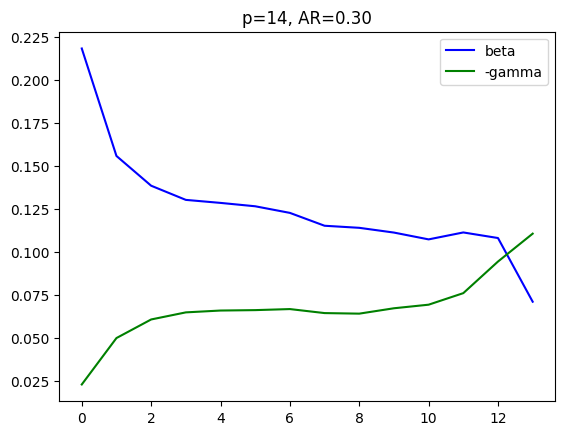

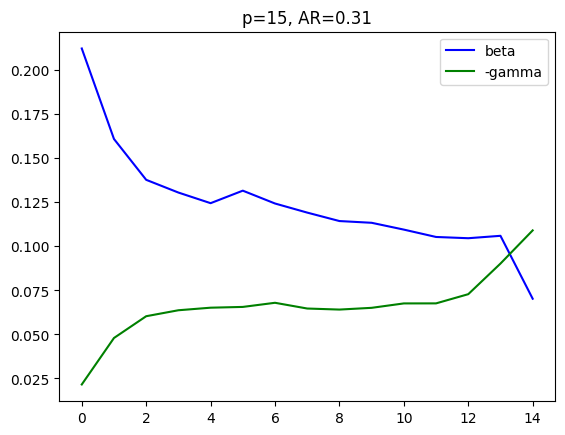

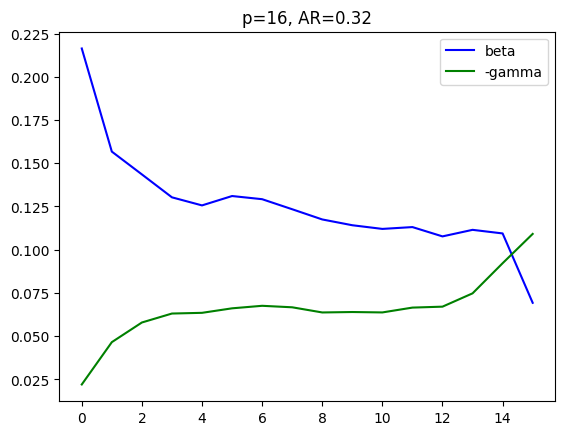

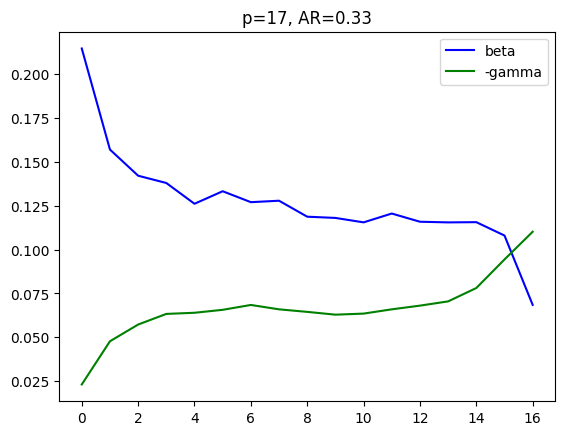

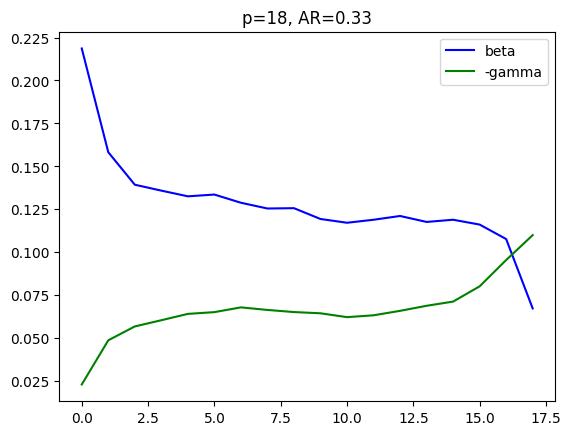

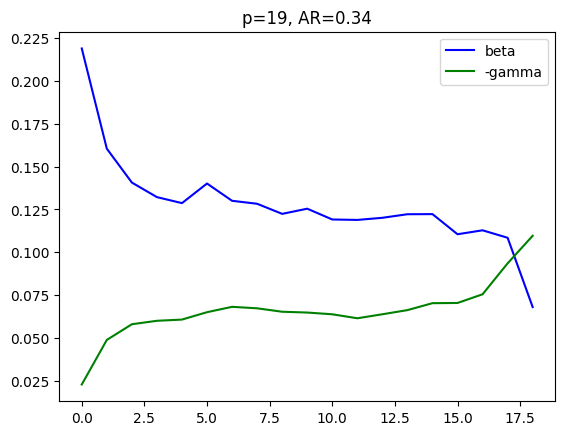

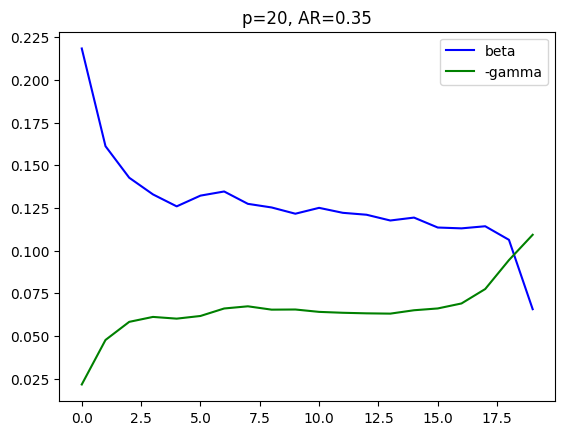

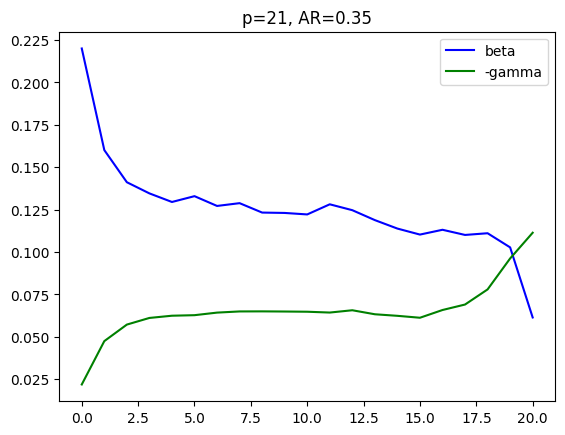

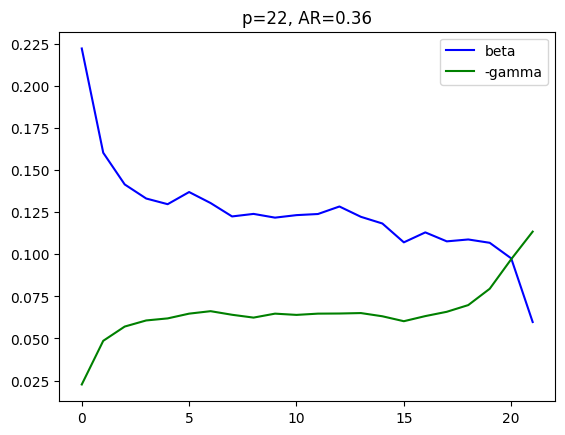

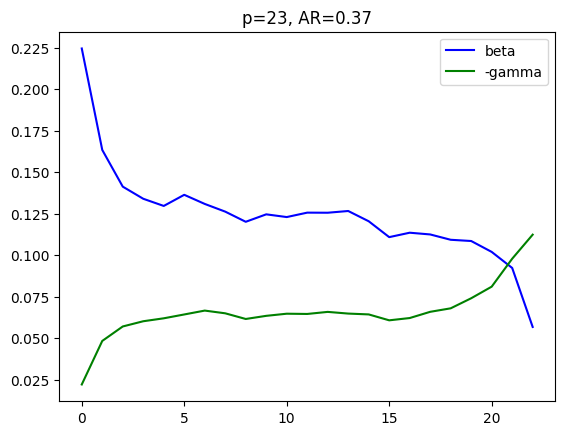

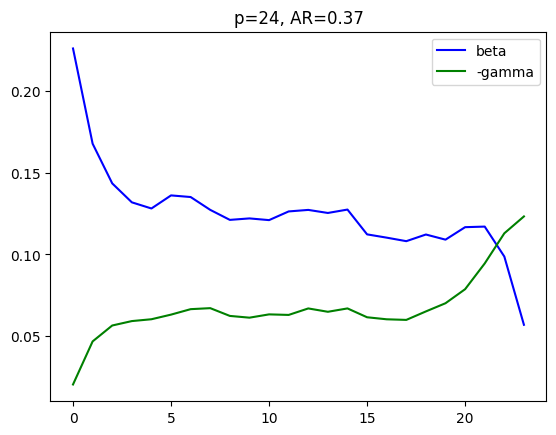

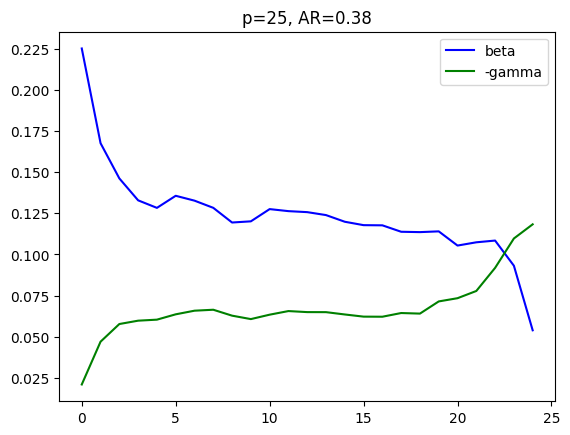

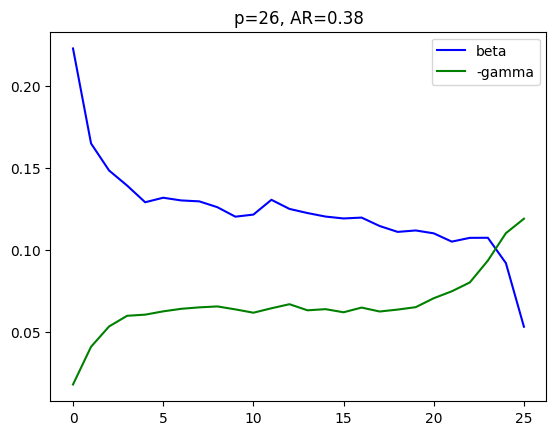

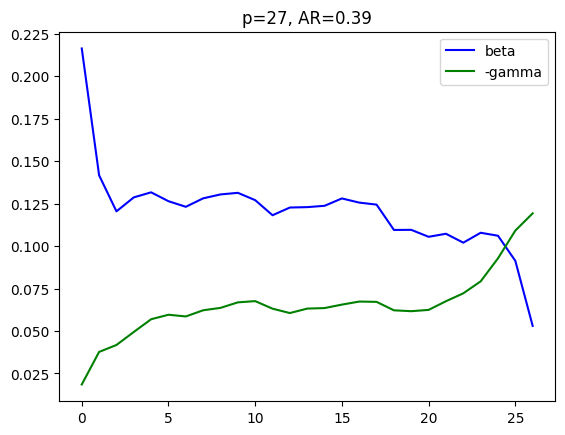

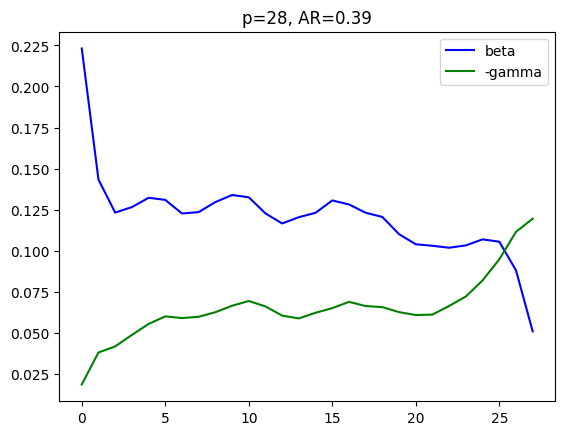

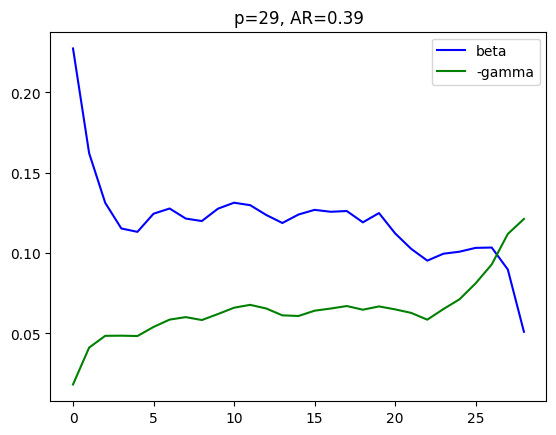

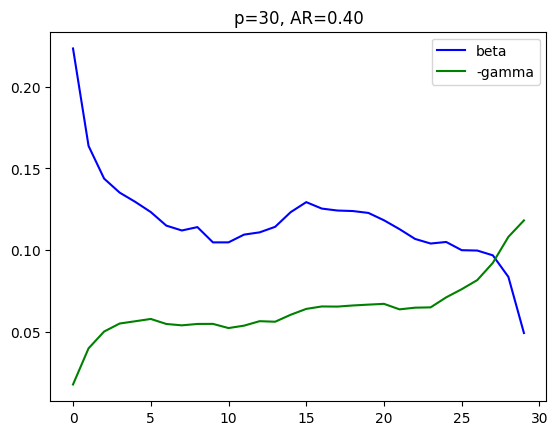

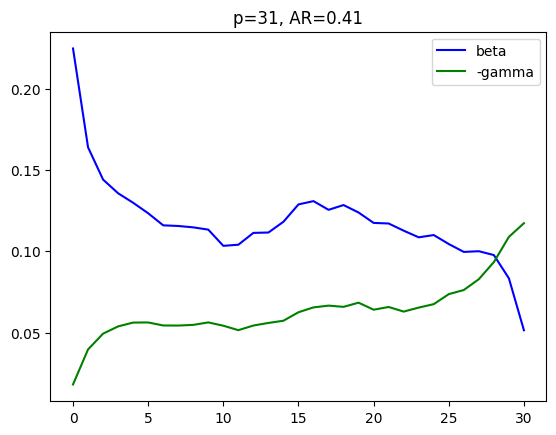

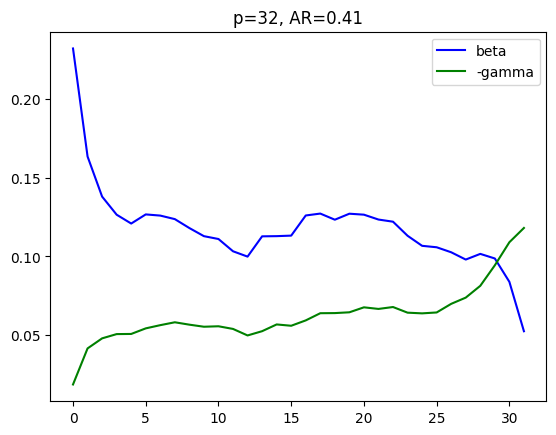

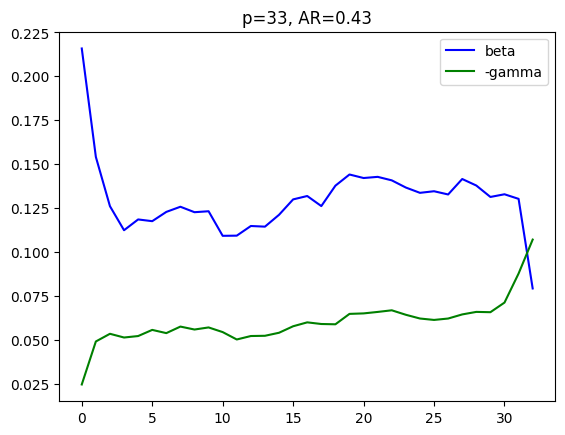

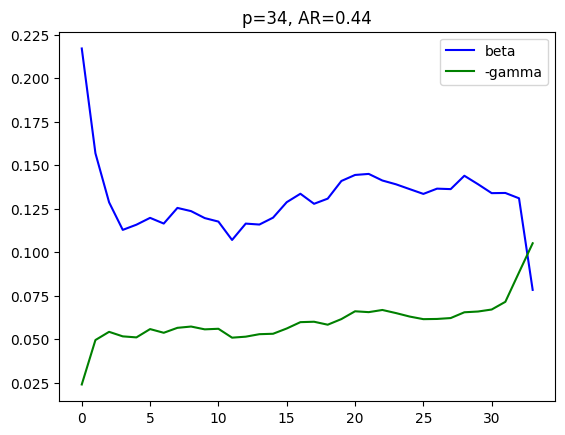

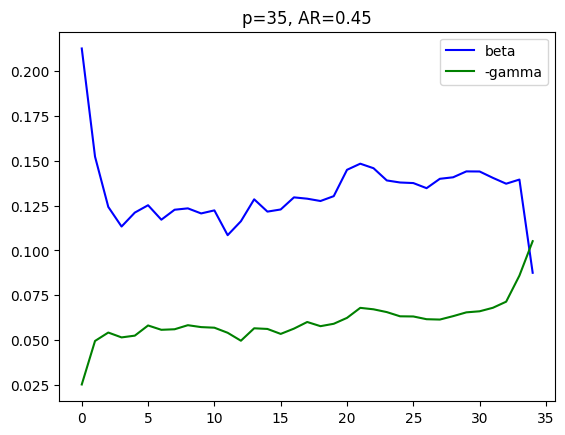

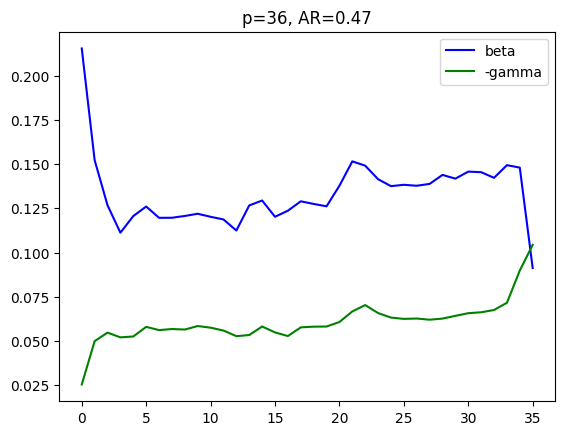

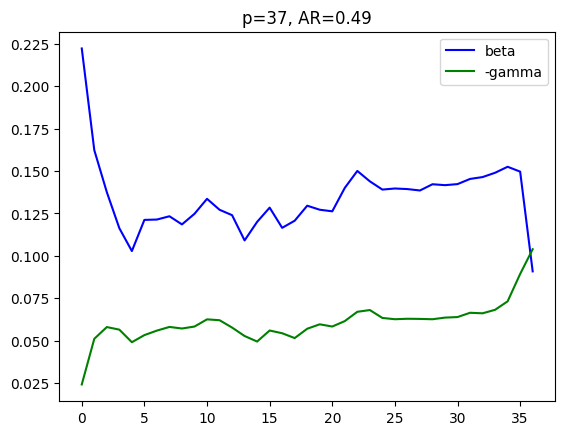

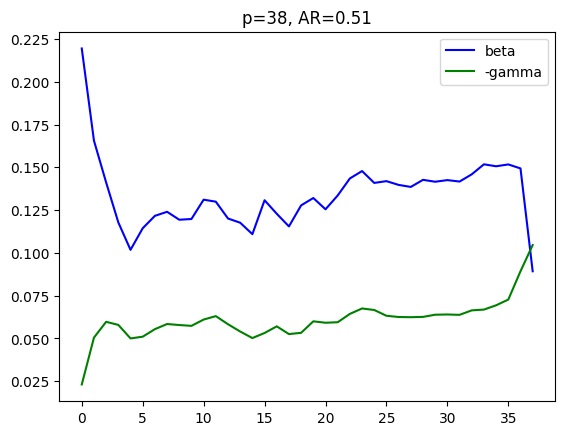

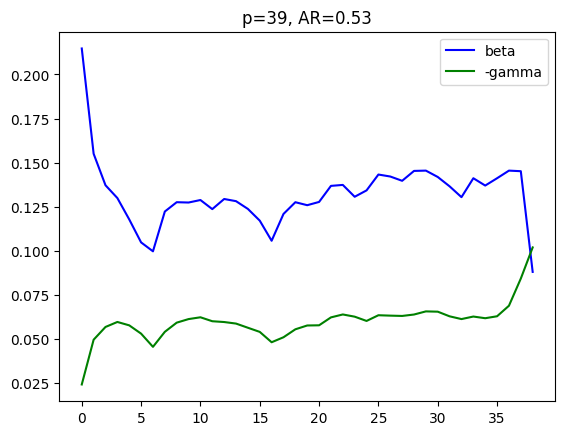

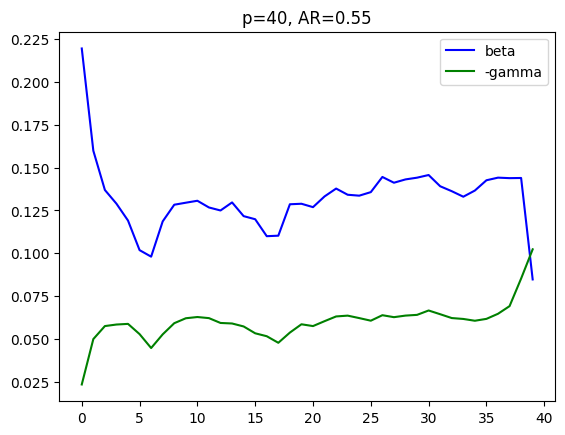

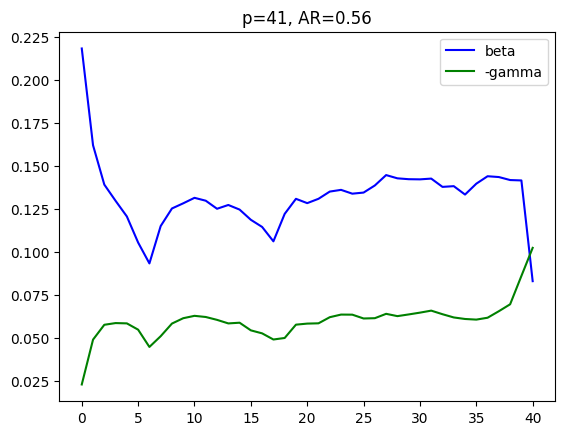

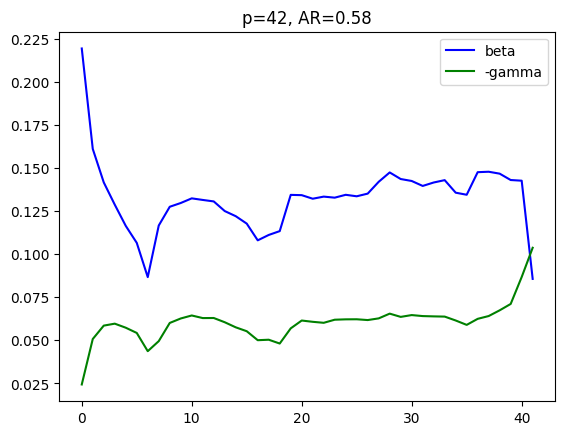

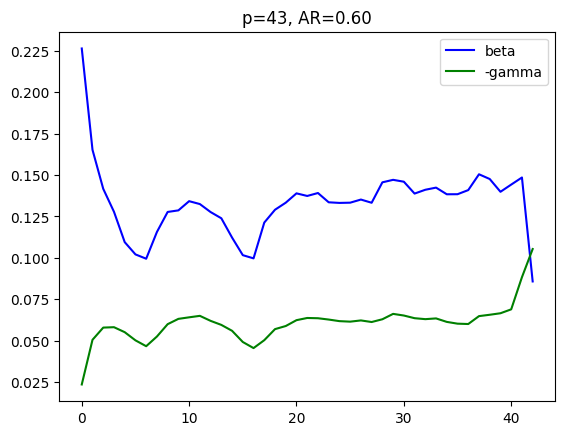

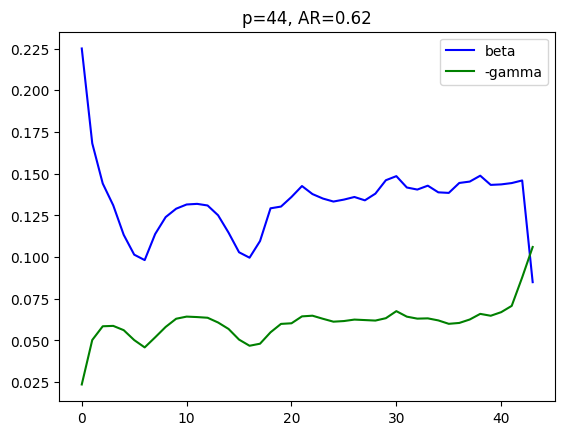

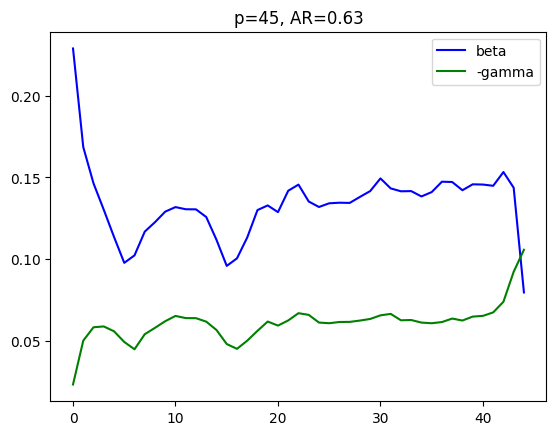

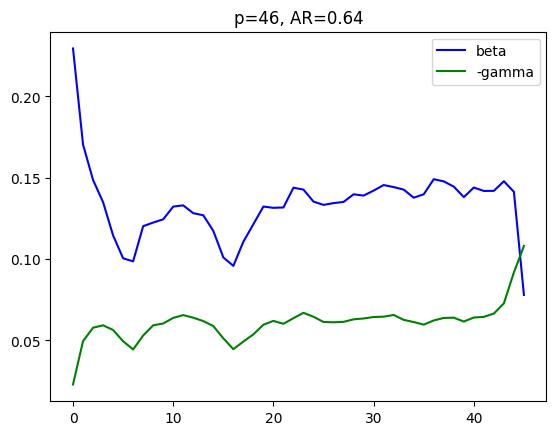

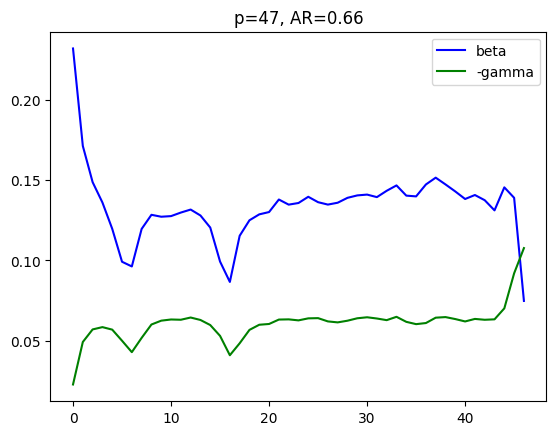

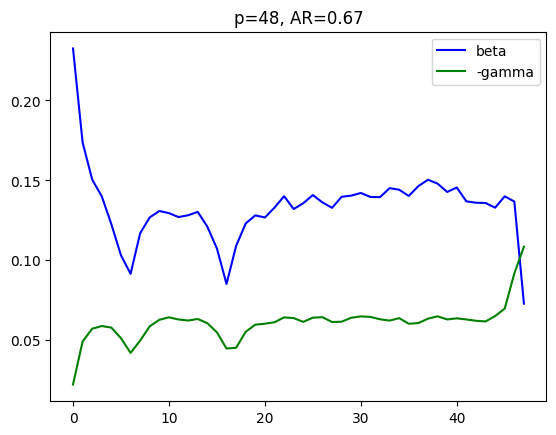

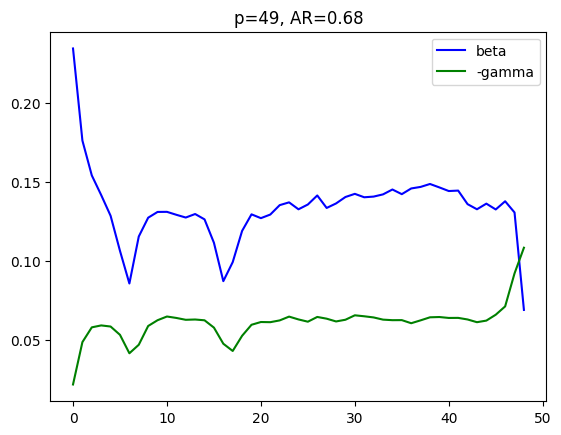

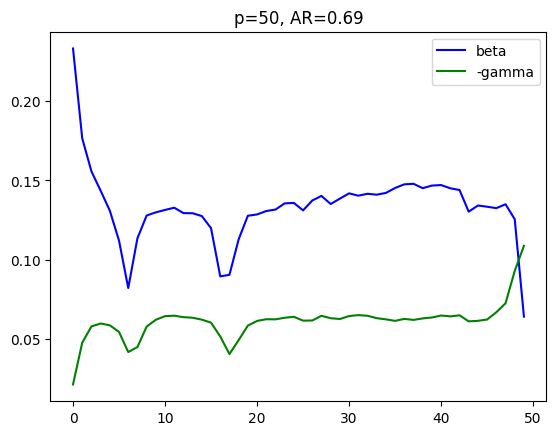

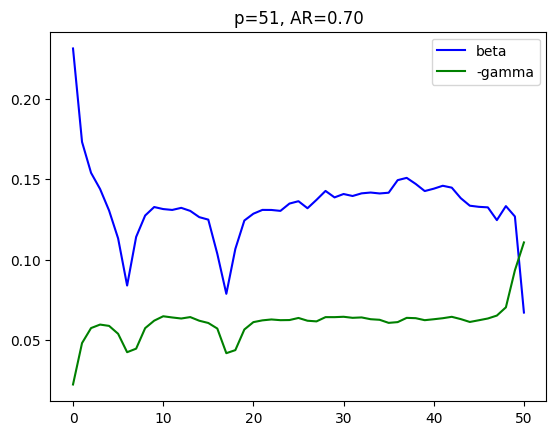

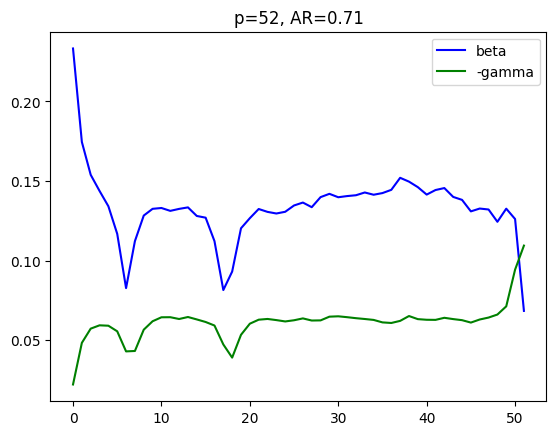

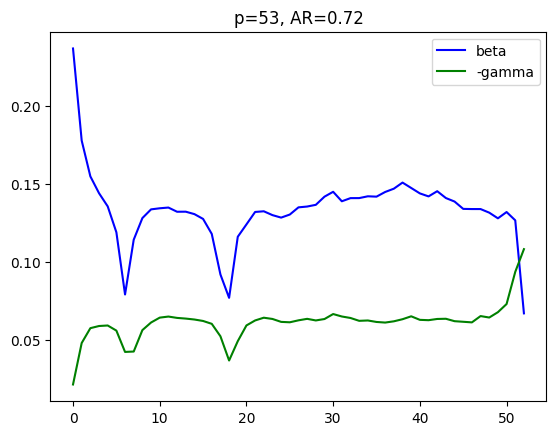

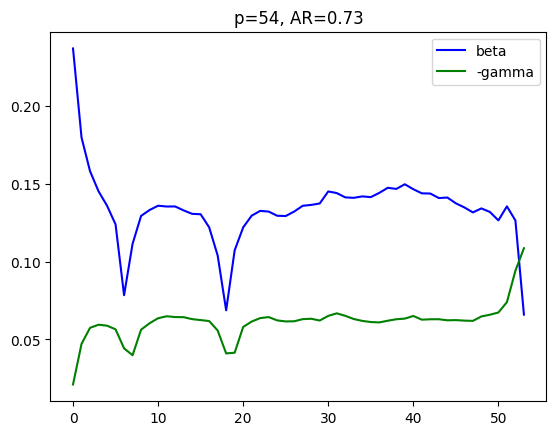

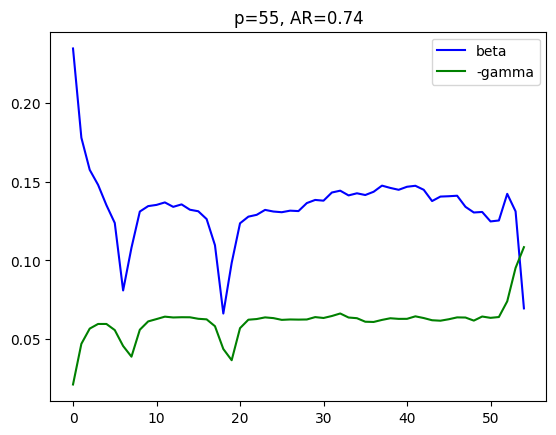

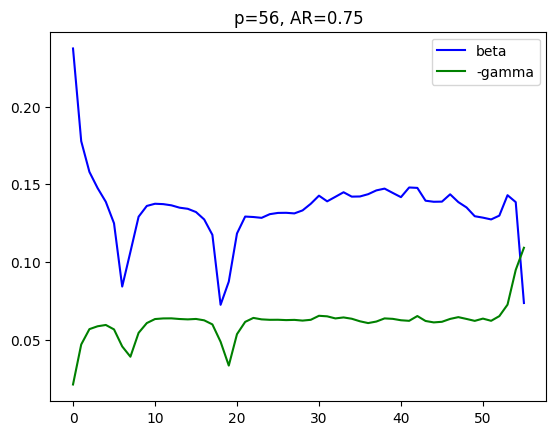

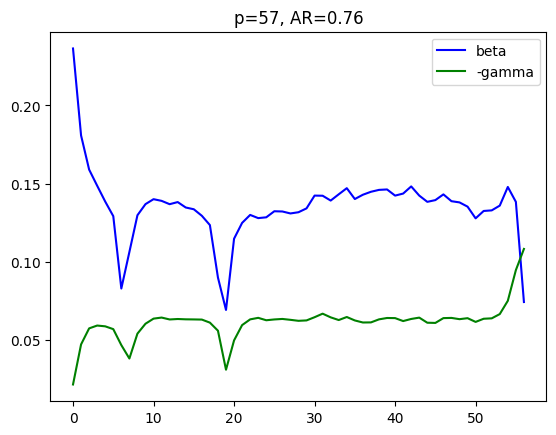

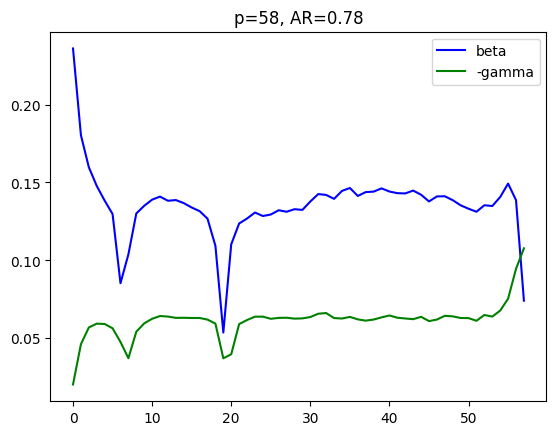

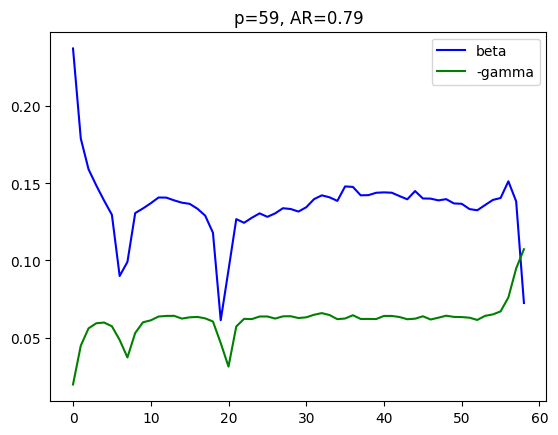

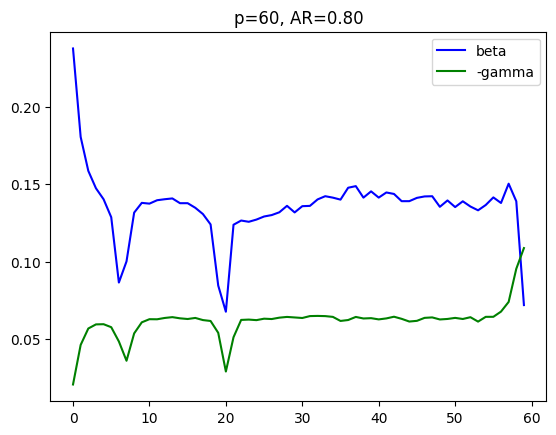

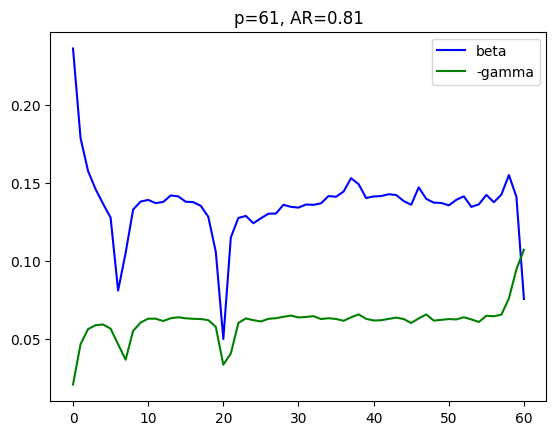

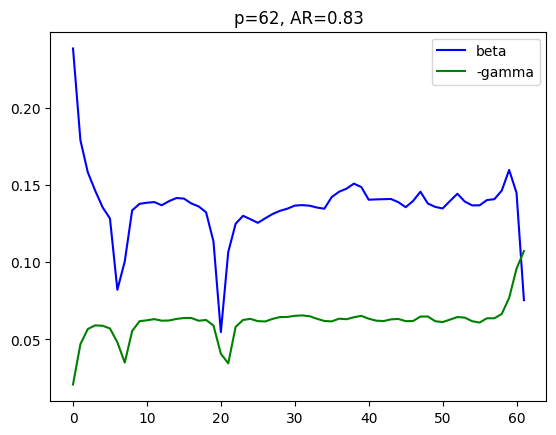

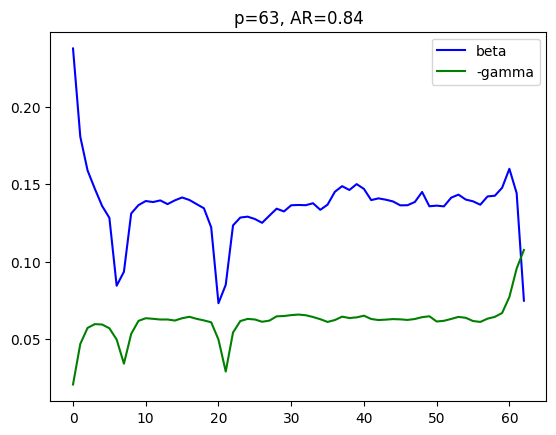

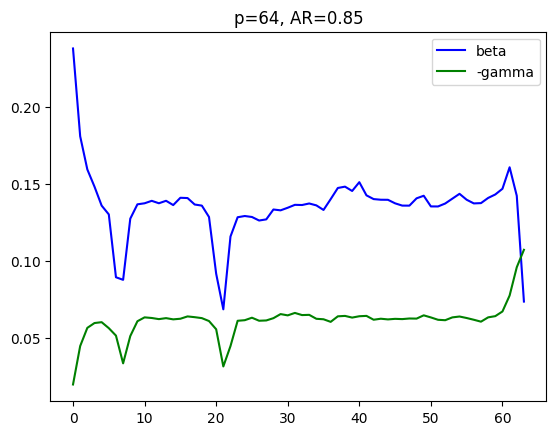

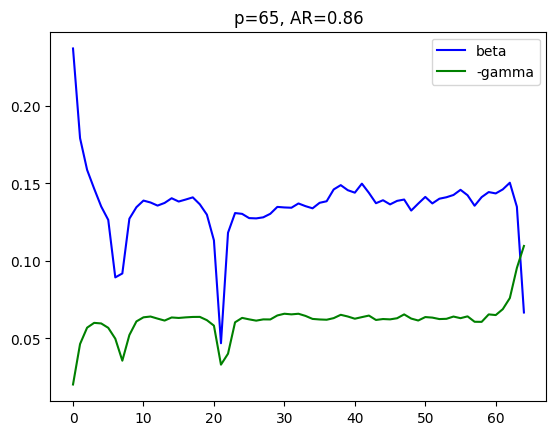

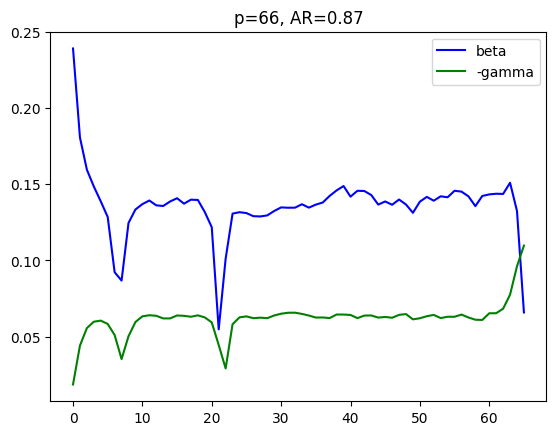

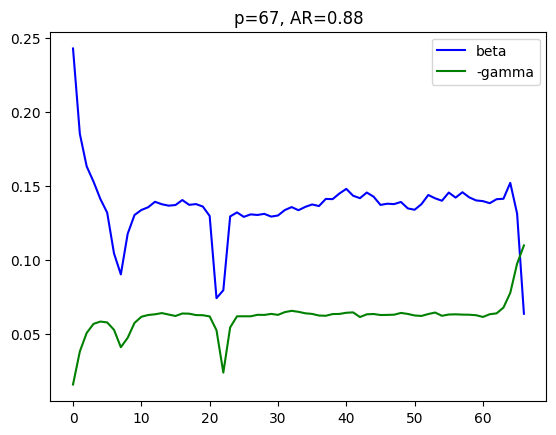

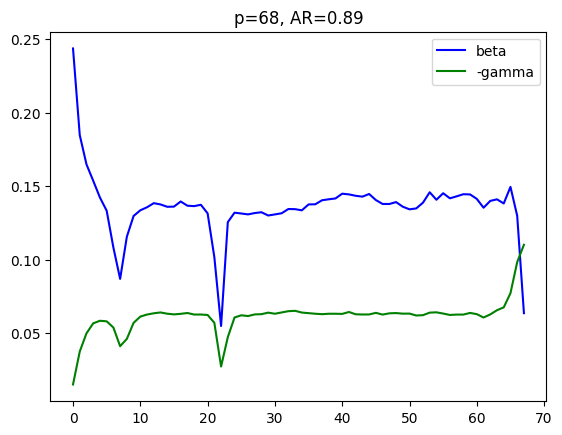

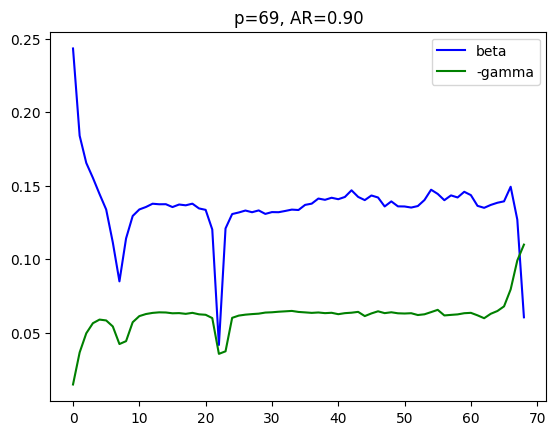

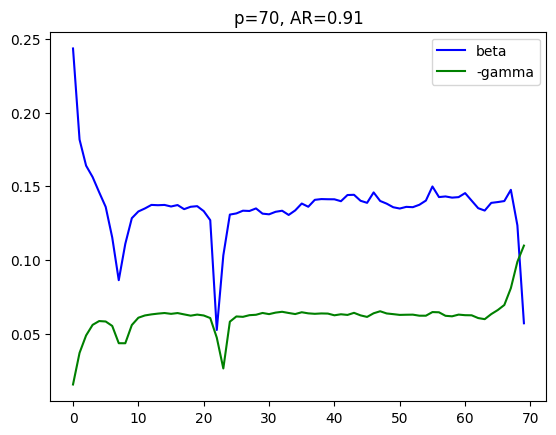

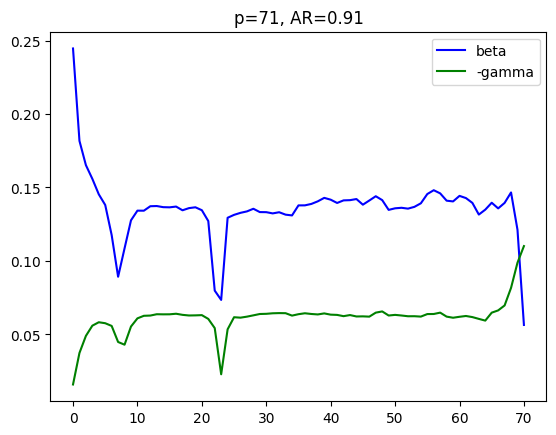

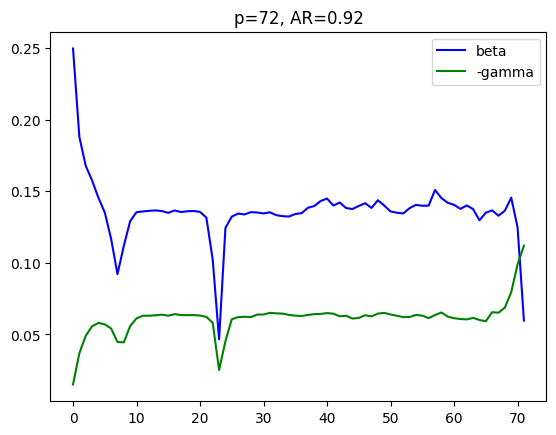

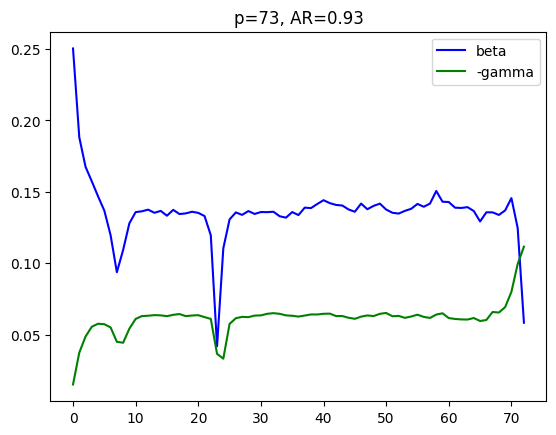

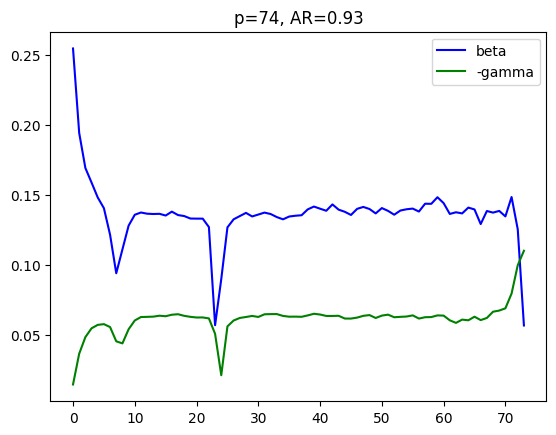

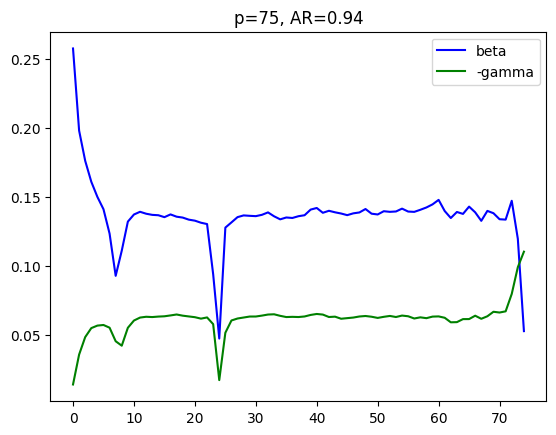

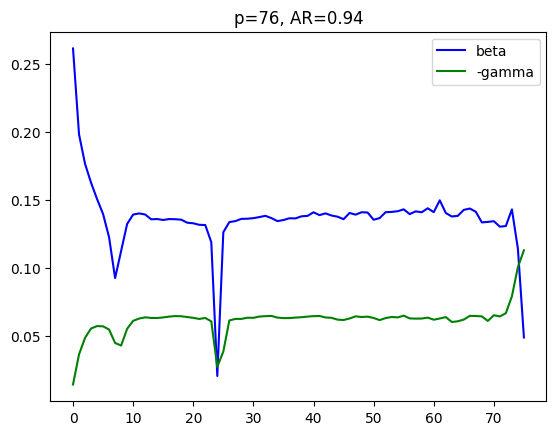

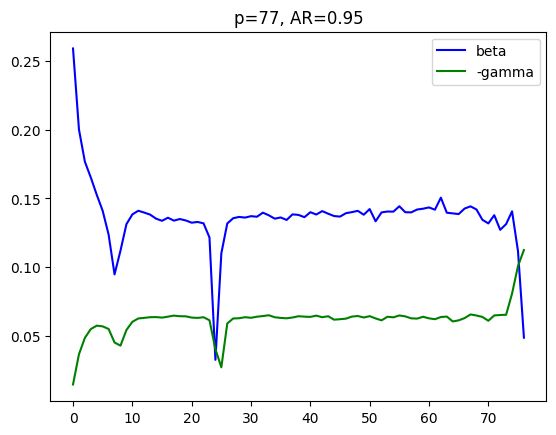

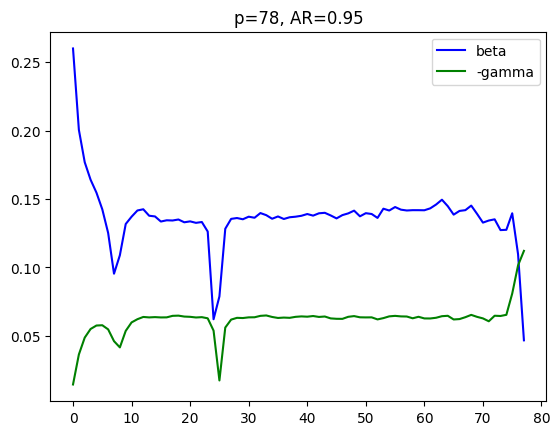

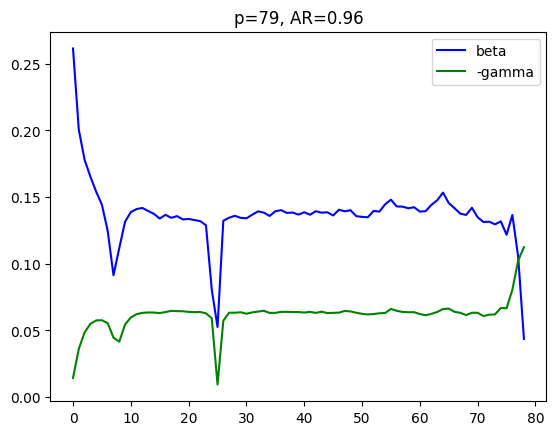

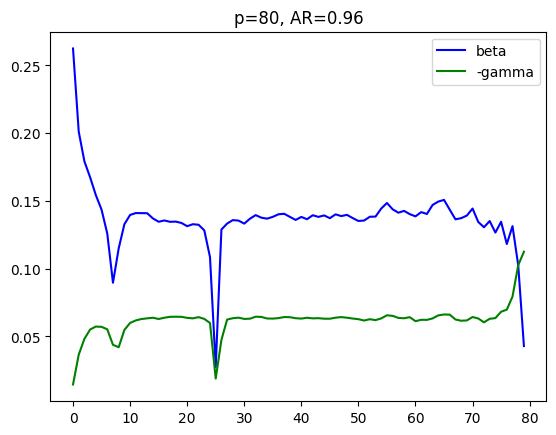

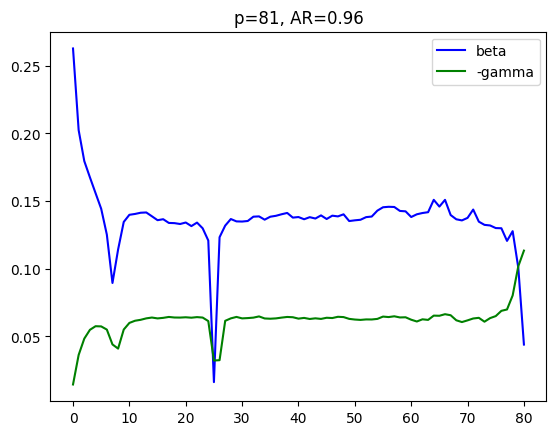

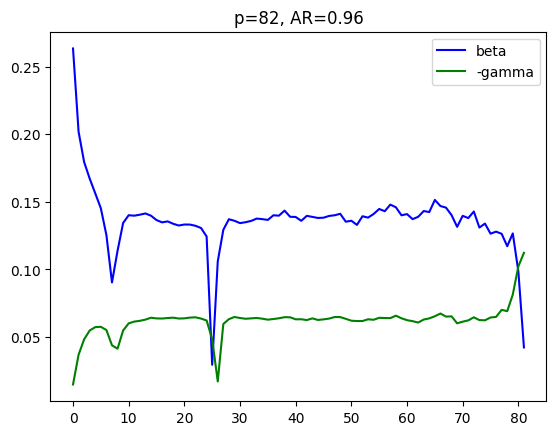

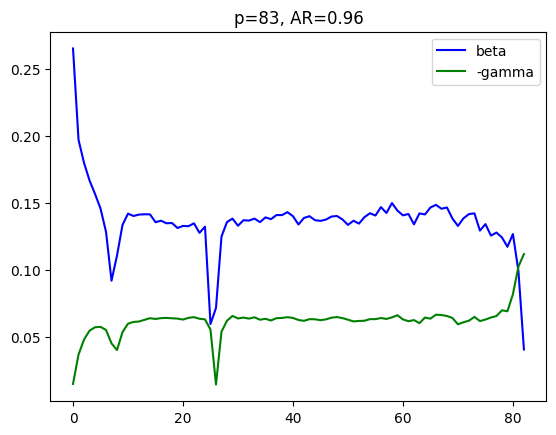

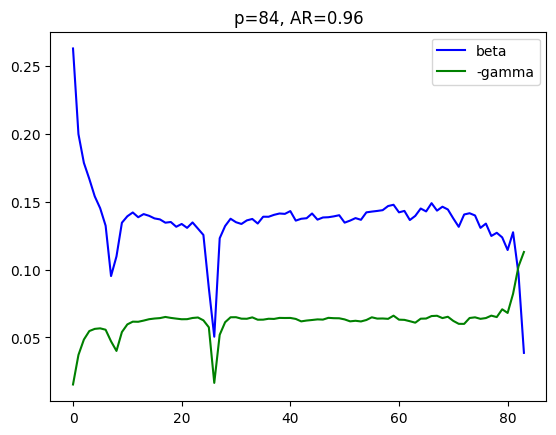

In [55]:
import numpy as np

suffix = " opt4MF"
for _, row1 in df[(df['N'] == 13) & (df['p'] > 3)].sort_values('p').iterrows():
# row = df[(df['N'] == 13) & (df['p'] == 12)].squeeze()
# for row1 in [r
    plt.plot(row1['beta'], label='beta', c='b')
    plt.plot(-np.array(row1['gamma']), label='-gamma', c='g')
    title = f"p={row1['p']}, AR={row1['AR']:.2f}"
    plt.title(title)
    plt.legend()
    plt.show()